## How to properly sort earthquakes based on their locations?

### Download test data

In [14]:
import os
!os.system('curl -O -J -L https://osf.io/945dq/download')

zsh:1: number expected


### Read catalog

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
events = pd.read_csv("catalog_gamma.csv", sep="\t")

X = []
deg2km = 111.1949
center = [events["longitude"].mean(), events["latitude"].mean()]
for index, event in events.iterrows():
    X.append([(event["longitude"]-center[0])*deg2km*np.cos(np.deg2rad(event["latitude"])), 
              (event["latitude"]-center[1])*deg2km, 
               event["depth(m)"]/1e3])
    # X.append([(event["longitude"])*deg2km*np.cos(np.deg2rad(event["latitude"])), 
    #           (event["latitude"])*deg2km, 
    #            event["depth(m)"]/1e3])
X = np.array(X)
print(X.shape)
X = X[:10000]

(24479, 3)


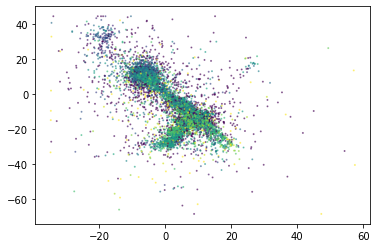

In [17]:
plt.figure()
# plt.scatter(events["longitude"], events["latitude"], c=events["depth(m)"]/1e3, alpha=0.5, s=1.0)
plt.scatter(X[:,0], X[:,1], c=X[:,2], alpha=0.5, s=1.0)
plt.show()

### Sorting using *Hierarchy Clustering*

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

In [19]:
Z = linkage(X, 'ward', optimal_ordering=False)
index = leaves_list(Z)

In [20]:
X_ = X[index]
D = np.sqrt(np.sum((X_[:,np.newaxis,:2] - X_[np.newaxis,:,:2])**2, axis=-1))

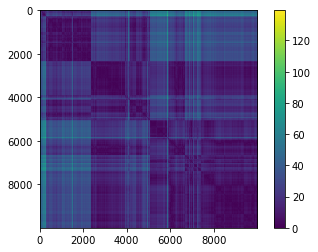

In [21]:
plt.figure()
# plt.pcolormesh(D)
plt.imshow(D)
plt.axis("scaled")
plt.colorbar()
plt.show()

### Sorting using *Minimum Spanning Tree*

In [22]:
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse.csgraph import breadth_first_order

In [23]:
D = np.sqrt(((X[:, np.newaxis, :2] -  X[np.newaxis, :, :2])**2).sum(axis=-1))

In [24]:
Tcsr = minimum_spanning_tree(D)

In [25]:
index = breadth_first_order(Tcsr, i_start=0, directed=False, return_predecessors=False)

In [26]:
X_ = X[index]
D = np.sqrt(np.sum((X_[:,np.newaxis,:2] - X_[np.newaxis,:,:2])**2, axis=-1))

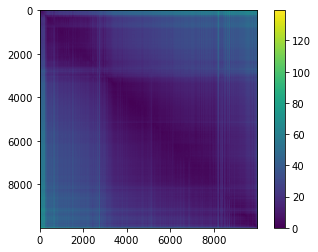

In [27]:
plt.figure()
# plt.pcolormesh(D)
plt.imshow(D)
plt.axis("scaled")
plt.colorbar()
plt.show()